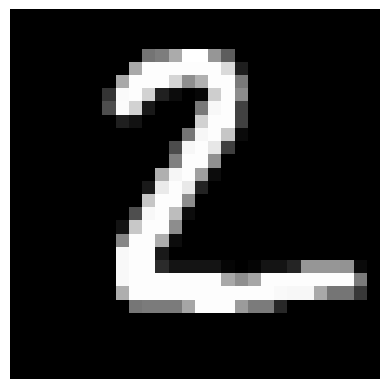

In [1]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import random
import matplotlib.pyplot as plt


csv_file = r"C:\Users\Aaditya\Desktop\ipcv_pracs\data\mnist_test.csv"  # Replace with the provided file name
data = pd.read_csv(csv_file)

labels = data.iloc[:, 0]  # First column: Labels
pixels = data.iloc[:, 1:]  # Remaining columns: Pixel data

# Directory to save images
output_dir = r"C:\Users\Aaditya\Desktop\ipcv_pracs\mnist_images"
os.makedirs(output_dir, exist_ok=True)

for idx, (label, pixel_values) in enumerate(zip(labels, pixels.values)):
    image_array = pixel_values.reshape(28, 28).astype(np.uint8)
    img = Image.fromarray(image_array)
    img.save(f"{output_dir}/{label}_{idx}.png")
    if idx >= 10: 
        break


image_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(output_dir, random_image_file)
random_img = Image.open(random_image_path)


plt.imshow(random_img, cmap="gray")
plt.axis('off')  
plt.show()




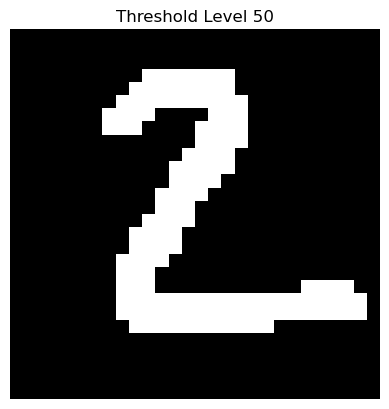

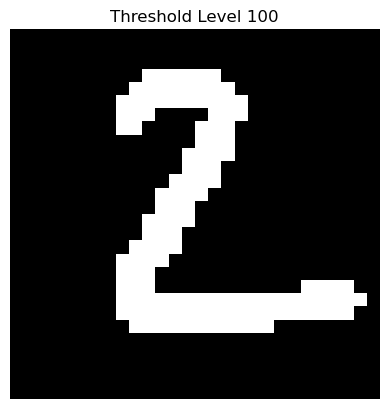

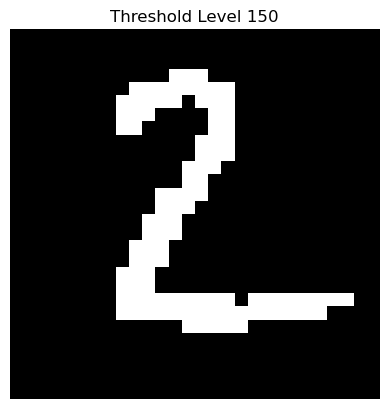

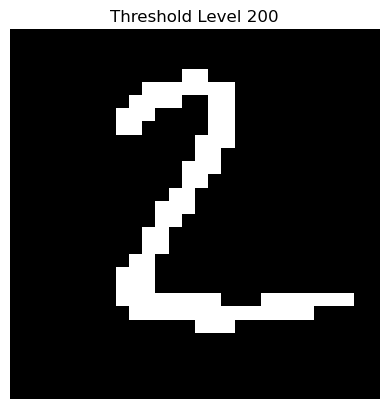

In [ ]:

def threshold_image(image, threshold_value):
    image_array = np.array(image)
    thresholded_image = np.where(image_array > threshold_value, 255, 0)  
    thresholded_image = thresholded_image.astype(np.uint8)
    return Image.fromarray(thresholded_image)


threshold_levels = [50, 100, 150, 200]
for level in threshold_levels:
    thresholded_img = threshold_image(random_img, level)
    plt.imshow(thresholded_img, cmap='gray')
    plt.title(f"Threshold Level {level}")
    plt.axis('off')
    plt.show()


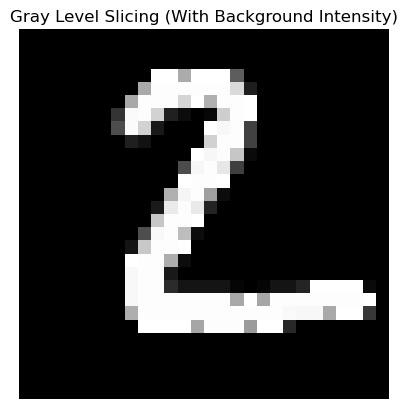

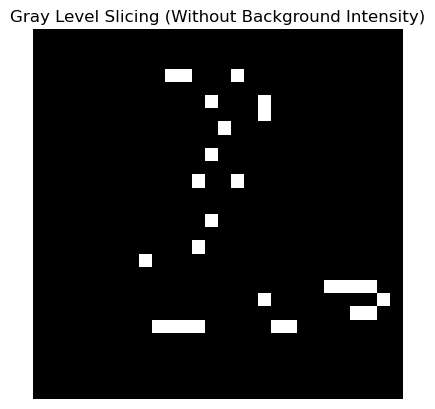

In [3]:
def gray_level_slicing(image, min_value, max_value, background_intensity=True):
    image_array = np.array(image)

    # Apply slicing: pixels within the range are set to 255 (white), others are unchanged
    sliced_image = np.where((image_array >= min_value) & (image_array <= max_value), 255, image_array)

    # If background intensity is False, set background pixels to black (0)
    if not background_intensity:
        sliced_image = np.where((image_array < min_value) | (image_array > max_value), 0, sliced_image)

    return Image.fromarray(sliced_image.astype(np.uint8))

# Slicing the image with and without background intensity slicing
min_value, max_value = 100, 150  # Range for gray level slicing

# With background intensity (original values outside the range remain unchanged)
sliced_img_with_bg = gray_level_slicing(random_img, min_value, max_value, background_intensity=True)
plt.imshow(sliced_img_with_bg, cmap='gray')
plt.title("Gray Level Slicing (With Background Intensity)")
plt.axis('off')
plt.show()

# Without background intensity (everything outside the range becomes black)
sliced_img_without_bg = gray_level_slicing(random_img, min_value, max_value, background_intensity=False)
plt.imshow(sliced_img_without_bg, cmap='gray')
plt.title("Gray Level Slicing (Without Background Intensity)")
plt.axis('off')
plt.show()
